In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv', nrows=30000)

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
df.shape


(30000, 12)

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     29994 non-null  float64
 1   status          30000 non-null  object 
 2   price           30000 non-null  float64
 3   bed             22734 non-null  float64
 4   bath            22790 non-null  float64
 5   acre_lot        25297 non-null  float64
 6   street          29933 non-null  float64
 7   city            29984 non-null  object 
 8   state           30000 non-null  object 
 9   zip_code        29972 non-null  float64
 10  house_size      22901 non-null  float64
 11  prev_sold_date  10051 non-null  object 
dtypes: float64(8), object(4)
memory usage: 2.7+ MB


In [8]:
df.isnull().sum()

brokered_by           6
status                0
price                 0
bed                7266
bath               7210
acre_lot           4703
street               67
city                 16
state                 0
zip_code             28
house_size         7099
prev_sold_date    19949
dtype: int64

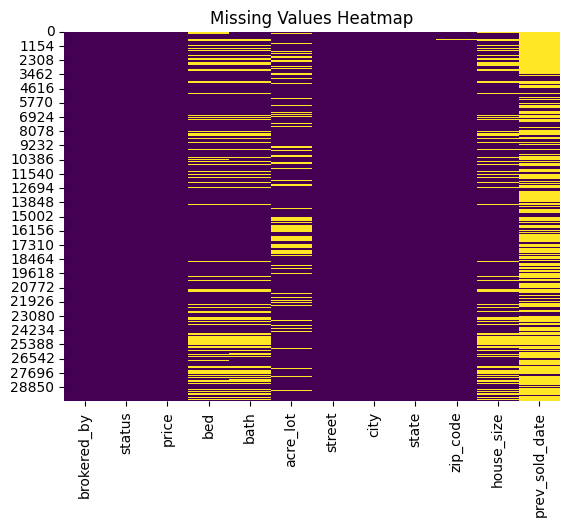

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
df['street'] = df['street'].fillna(df['street'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])

# Sayısal veriler için ortalama/medyan ile doldurma
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].mean())
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())


Eksik olan verileri mod, sayısal değerleri de ortalaması ile doldurdum.

In [11]:
df.isnull().sum()

brokered_by           6
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    19949
dtype: int64

In [12]:
df.dropna(subset=['price'], inplace=True)


In [13]:
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].mean())
df['street'] = df['street'].fillna(df['street'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())


In [14]:
df.isnull().sum()

brokered_by           6
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    19949
dtype: int64

In [15]:
df.dropna(subset=['brokered_by'], inplace=True)

6 veri eksik diye silme işlemi uyguluyorum

In [16]:
df.isnull().sum()

brokered_by           0
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    19945
dtype: int64

In [17]:
df.drop(columns=['prev_sold_date'], inplace=True)


In [18]:
df.isnull().sum()

brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
street         0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

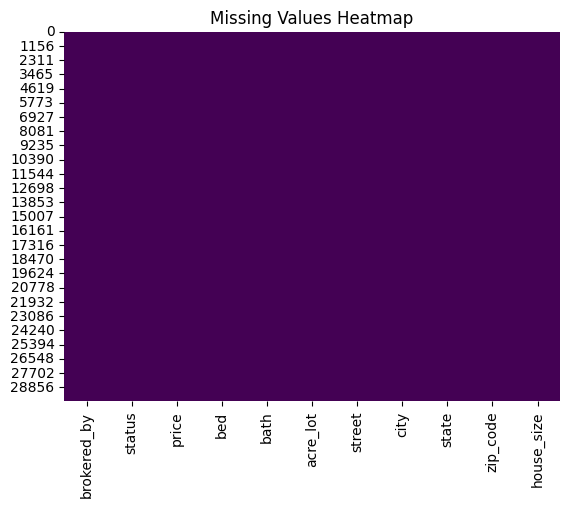

In [19]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [20]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,29994.000000,2.999400e+04,29994.000000,29994.000000,29994.000000,2.999400e+04,29994.000000,2.999400e+04
mean,51481.739148,6.720411e+05,3.369974,2.433620,21.704662,1.066632e+06,3411.327599,2.273068e+03
std,31897.221476,1.343926e+06,1.878333,1.866608,1012.924877,6.065307e+05,2479.451405,8.563162e+03
min,56.000000,1.000000e+00,1.000000,1.000000,0.000000,4.000000e+00,601.000000,1.000000e+02
25%,22611.000000,1.900000e+05,3.000000,2.000000,0.250000,5.537368e+05,1915.000000,1.372000e+03
50%,52607.000000,3.749000e+05,3.000000,2.000000,0.970000,1.090028e+06,2871.000000,2.214000e+03
75%,79077.000000,6.750000e+05,4.000000,3.000000,8.577500,1.619659e+06,4401.000000,2.285000e+03
max,110138.000000,6.000000e+07,99.000000,198.000000,100000.000000,2.001321e+06,99999.000000,1.450112e+06


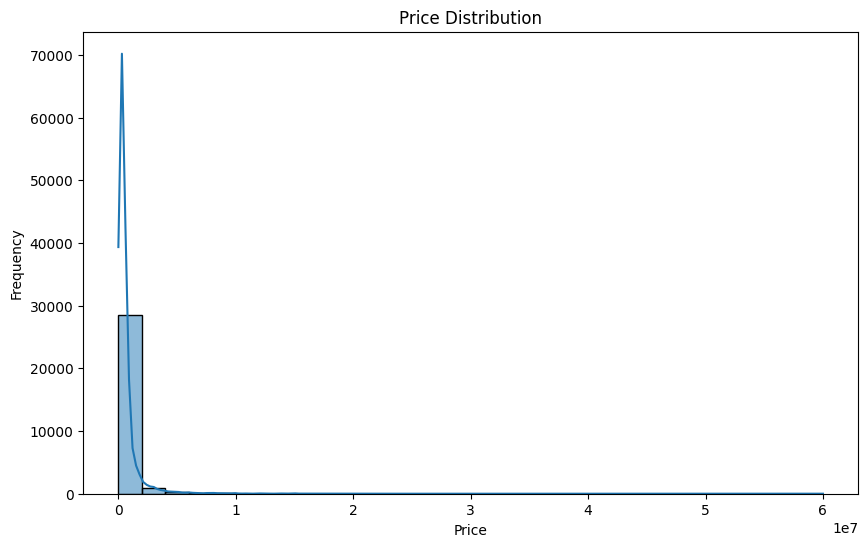

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


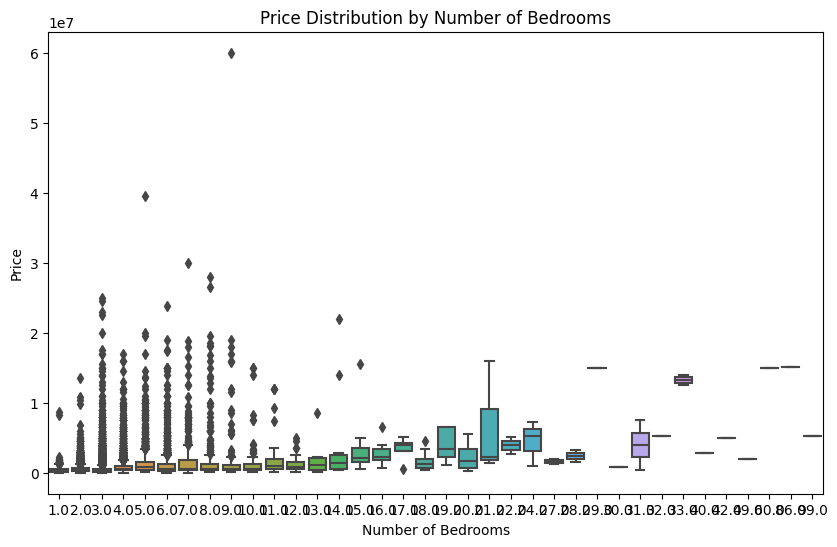

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bed', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


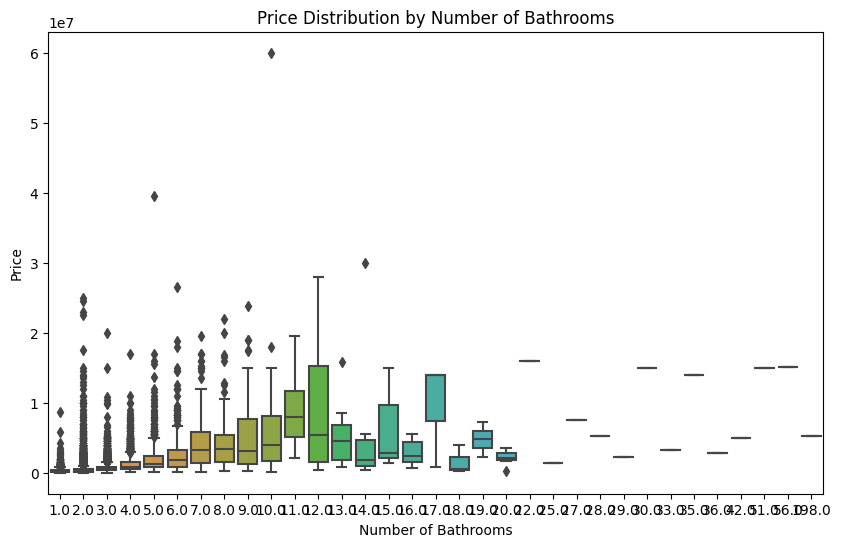

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bath', y='price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


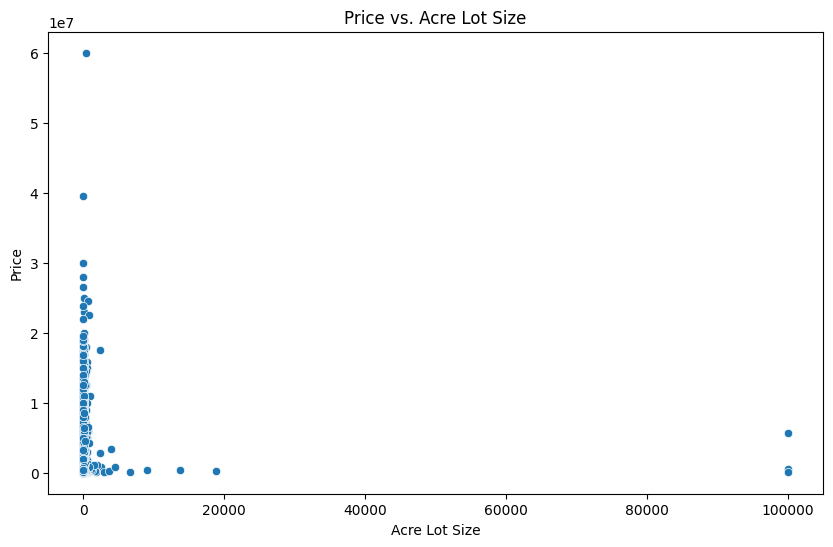

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acre_lot', y='price', data=df)
plt.title('Price vs. Acre Lot Size')
plt.xlabel('Acre Lot Size')
plt.ylabel('Price')
plt.show()


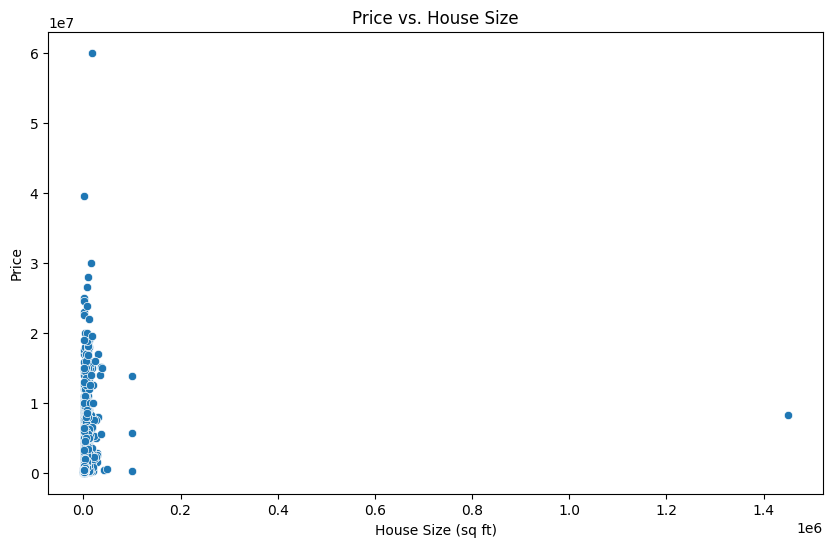

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=df)
plt.title('Price vs. House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.show()


In [26]:
print(df.dtypes)


brokered_by    float64
status          object
price          float64
bed            float64
bath           float64
acre_lot       float64
street         float64
city            object
state           object
zip_code       float64
house_size     float64
dtype: object


In [27]:
print(df.columns)


Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size'],
      dtype='object')


Sütun adlarını kontrol et

In [28]:
y = df['price']
X = df.drop(columns=['price'])


 Hedef ve özelliklerin belirlenmesi

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (20995, 10)
Test seti boyutu: (8999, 10)


Eğitim ve test setine ayırma

In [30]:
import pandas as pd

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Sütunları sayısal değerlere dönüştürdüm

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hatası (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("R-kare (R2):", r2)


Ortalama Kare Hatası (MSE): 1753066485479.0486
Ortalama Mutlak Hata (MAE): 447984.21031212533
R-kare (R2): -0.015706305380238206


Modeli oluşturup, öğrettim ve çıktı aldım

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi parametreler:", best_params)
print("En iyi MSE skoru:", -best_score)


En iyi parametreler: {'regressor__fit_intercept': True}
En iyi MSE skoru: 5.593201962370857e+35


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test seti MSE:", mse)
print("Test seti MAE:", mae)
print("Test seti R²:", r2)

Test seti MSE: 8.683609321267604e+31
Test seti MAE: 740312533793002.1
Test seti R²: -5.031182110962515e+19


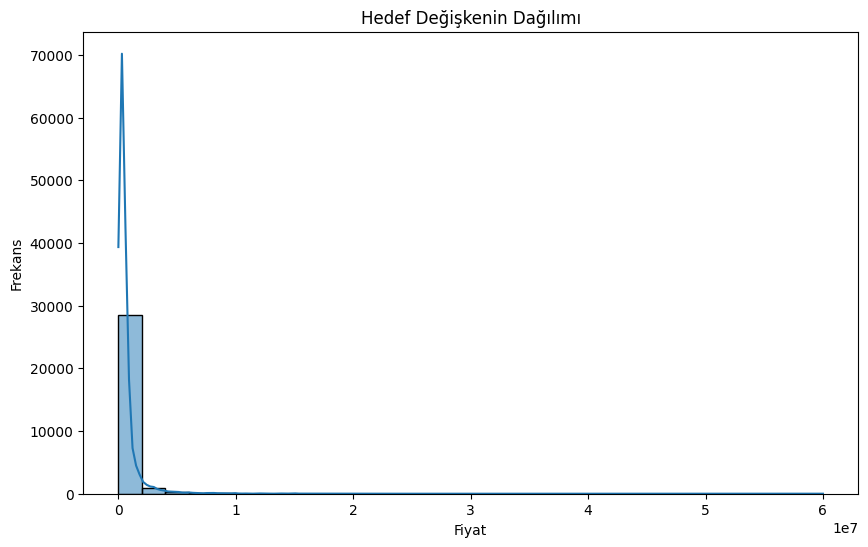

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Hedef Değişkenin Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

In [35]:
import numpy as np

y_log = np.log1p(y)  # 1 eklemek, 0 değerlerini logaritmik dönüşümde sorun çıkarmayacak

0 değerlerini logaritmik dönüşümde bulundum

In [36]:
y_filtered = y[y < 20]  


20 den büyük değerleri kaldırdım daha düzgün bir sonuç almak için

In [37]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Eğitim verileriyle destekledim

In [38]:
y_train_pred = pipeline.predict(X_train)

y_test_pred = pipeline.predict(X_test)


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Eğitim Seti MSE: {train_mse}")
print(f"Eğitim Seti MAE: {train_mae}")
print(f"Eğitim Seti R²: {train_r2}")

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Seti MSE: {test_mse}")
print(f"Test Seti MAE: {test_mae}")
print(f"Test Seti R²: {test_r2}")


Eğitim Seti MSE: 1070429283836.1451
Eğitim Seti MAE: 410706.0745684051
Eğitim Seti R²: 0.4183763625131388
Test Seti MSE: 8.683609321267604e+31
Test Seti MAE: 740312533793002.1
Test Seti R²: -5.031182110962515e+19


In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_ridge = grid_search.best_estimator_

y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Eğitim Seti MSE: {train_mse}")
print(f"Eğitim Seti MAE: {train_mae}")
print(f"Eğitim Seti R²: {train_r2}")

print(f"Test Seti MSE: {test_mse}")
print(f"Test Seti MAE: {test_mae}")
print(f"Test Seti R²: {test_r2}")


Eğitim Seti MSE: 1070452946461.6646
Eğitim Seti MAE: 409287.0499523341
Eğitim Seti R²: 0.41836350529544597
Test Seti MSE: 1742252730940.2468
Test Seti MAE: 446519.00940182706
Test Seti R²: -0.009440941938021918


Ridge regresyonu deneyerek daha başarılı bir sonuç elde etmeye çalıştım ve başarılı oldum 


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Veriyi ölçekleme ve Ridge regresyonu için bir pipeline oluştur
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Veriyi ölçeklendir
    ('regressor', Ridge())        # Ridge regresyonu uygula
])

# Düzenleme parametresi (alpha) için bir dizi değer belirleyin
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000]  # Farklı alpha değerleri
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi MSE skoru:", -grid_search.best_score_)


En iyi parametreler: {'regressor__alpha': 1000}
En iyi MSE skoru: 7103207164026.594


Ridge için bir pipline oluşturdum ve en iyi değerleri çıkarttım.


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Test Seti MSE:", mse_test)
print("Test Seti MAE:", mae_test)
print("Test Seti R²:", r2_test)


Test Seti MSE: 1661553006804.561
Test Seti MAE: 435585.4833005831
Test Seti R²: 0.0373155383928786


En iyi modeli kullanarak test verilerini tahmin ettim ve çıkarttım verileri


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = np.random.rand(100, 1) * 10  
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Karesel Hata (MSE): {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Ortalama Mutlak Hata (MAE): {mae}")


Ortalama Karesel Hata (MSE): 4.286786581626172
Ortalama Mutlak Hata (MAE): 1.5584958048650086


Örnek veri oluşturup test ettim ve sonuçlarını çıkarttım. Sonuçtan memnun kalmadım ve Random Forest modelini kullandım



In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f"Karışıklık Matrisi:\n{cm}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Kesinlik (Precision): {precision}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Duyarlılık (Recall): {recall}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Puanı (F1 Score): {f1}")


Karışıklık Matrisi:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Doğruluk (Accuracy): 1.0
Kesinlik (Precision): 1.0
Duyarlılık (Recall): 1.0
F1 Puanı (F1 Score): 1.0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest Mean Absolute Error (MAE):", mae_rf)
print("Random Forest R² Score:", r2_rf)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Mean Squared Error (MSE): 0.0020277200457195312
Random Forest Mean Absolute Error (MAE): 0.016318282643282632
Random Forest R² Score: 0.9970986517628815


bunda daha güzel bir sonuç elde ettim